<a href="https://colab.research.google.com/github/BederCC/Platzi-Examenes/blob/main/Plantas_Medicinales_Arbol_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Árbol de Decisión
```
Versión   : 1.1, Para uso educativo
Autor     : Luis Beltran Palma Ttito
Lugar     : Cusco, Perú, 2022.
Proposito : Implementación de Árbol de Decisión
Problema  : Clasificación de 3 especies den iris
```

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Librería

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

# Librerías para métricas
import sklearn.metrics as metrics

# Librerías para Árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#2. Leer datos

In [45]:
datos = pd.read_csv("/content/drive/MyDrive/Machine Learning/PLANTA_MEDICINAL.csv", sep=',')
datos

,0,1,2,3,4,5,6,7,8,9,...,4791,4792,4793,4794,4795,4796,4797,4798,4799,4800
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Arive_Dantu
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Arive_Dantu
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Arive_Dantu
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Arive_Dantu
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Arive_Dantu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Sandalwood
1089,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Sandalwood
1090,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Sandalwood
1091,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Sandalwood


#5. Distribución de clases

In [165]:
print(datos.groupby('4800').size())

4800
Arive_Dantu                48
Basale                     50
Crape_Jasmine              44
Drumstick                  50
Fenugreek                  36
Guava                      43
Hibiscus                   41
Indian_Beech               45
Indian_Mustard             34
Jackfruit                  45
Jamaica_Cherry_Gasagase    48
Jamun                      39
Jasmine                    45
Lemon                      49
Mango                      48
Mexican_Mint               48
Mint                       49
Neem                       47
Oleander                   47
Peepal                     50
Pomegranate                48
Rasna                      47
Rose_apple                 42
Sandalwood                 50
dtype: int64


#6. Separación de datos, para entrenamiento y test

In [194]:
X = datos.drop(['4800'], axis = 1)
y = datos['4800']

# Separa datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y)

#7. Entrenamiento del árbol de decisión

In [192]:
# Crear el obj árbol de decisión
# HIPERPARAMETROS
#================
# Indice de impuresa GINI: (criterion)
# Máxima profundiad del árbol:  (max_depth)
ArbolDecision = DecisionTreeClassifier(criterion = 'gini', max_depth=150)

# entrenar el árbol de decisión
ArbolDecision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=150)

# Test AD

In [195]:
ArbolDecision.score(X_test, y_test)

0.8868613138686131

#8. Gráfica del árbol de decisión

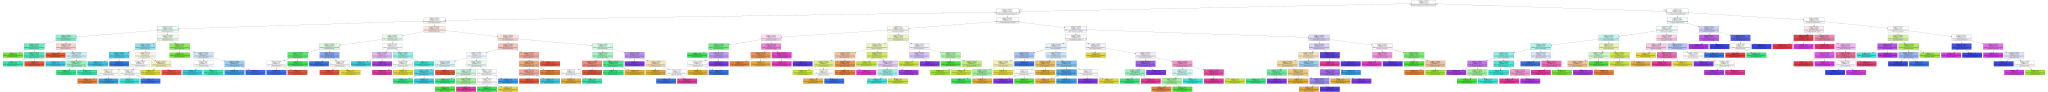

In [196]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(ArbolDecision, feature_names=X.columns, filled=True))
SVG(graph.pipe(format="svg"))

#8. Test

In [197]:
pred = ArbolDecision.predict(X_test)
print(pred)
print(y_test)

['Indian_Mustard' 'Mint' 'Arive_Dantu' 'Rose_apple'
 'Jamaica_Cherry_Gasagase' 'Fenugreek' 'Guava' 'Jackfruit' 'Crape_Jasmine'
 'Jamaica_Cherry_Gasagase' 'Mint' 'Neem' 'Guava' 'Mexican_Mint' 'Mango'
 'Drumstick' 'Mango' 'Crape_Jasmine' 'Mexican_Mint' 'Mango' 'Rose_apple'
 'Guava' 'Neem' 'Sandalwood' 'Hibiscus' 'Oleander' 'Jackfruit' 'Jackfruit'
 'Arive_Dantu' 'Basale' 'Oleander' 'Guava' 'Hibiscus' 'Jackfruit'
 'Hibiscus' 'Pomegranate' 'Jasmine' 'Arive_Dantu' 'Mint' 'Mint' 'Guava'
 'Lemon' 'Mexican_Mint' 'Rose_apple' 'Hibiscus' 'Indian_Beech' 'Drumstick'
 'Mexican_Mint' 'Rasna' 'Drumstick' 'Hibiscus' 'Mint' 'Jasmine' 'Hibiscus'
 'Indian_Mustard' 'Drumstick' 'Rasna' 'Crape_Jasmine' 'Drumstick' 'Basale'
 'Jamaica_Cherry_Gasagase' 'Sandalwood' 'Pomegranate' 'Drumstick'
 'Jackfruit' 'Rasna' 'Neem' 'Rose_apple' 'Jamun' 'Drumstick' 'Peepal'
 'Oleander' 'Indian_Mustard' 'Sandalwood' 'Neem' 'Jamaica_Cherry_Gasagase'
 'Rasna' 'Oleander' 'Arive_Dantu' 'Jackfruit' 'Lemon' 'Peepal' 'Peepal'
 'Jamai

#9. Matriz de confusión y métricas

In [198]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[10  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0]
 [ 0 11  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  1  0 10  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  8  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 

<Axes: >

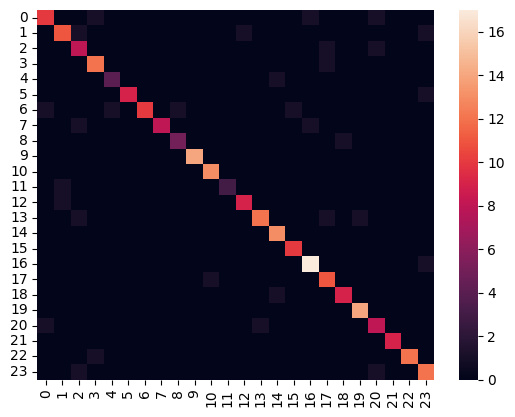

In [199]:
categorias = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
sns.heatmap(MatrizConfusion, yticklabels=categorias, xticklabels=categorias)

#10. Predicción